#<a name='8'></a>
<div dir='rtl'>
<h1>8.تخمین توزیع دوجمله‌ای به کمک توزیع‌های نرمال و پواسون</h1>
</div>



<div dir='rtl'>
همانطور که در ارائه‌ی درس مطرح شد، توزیع دو‌جمله‌ای تحت شرایط ویژه‌ای به صورت حدی به توزیع‌های پواسن و نرمال میل می‌کند. بنابراین جهت محاسبه‌ی احتمال توزیع دو‌جمله‌ای در مسائل با ابعاد بزرگ می‌توان از تقریب‌های پواسن و نرمال استفاده نمود.
در این بخش قصد داریم در قالب یک مثال واقعی درستی و شرایط استفاده هر‌بک از تقریب‌های مذکور را به دقت بررسی نماییم.</div>

<div dir='rtl'>
مثال) مطابق گزارش آمار تصادف و حوادث جاده‌ای پژوهشکده‌ی مرکز آمار ایران، روزانه در شهر تهران به صورت میانگین 
$235$
تصادف رخ می‌دهد.
مطابق مطالعات صورت گرفته مرگ یک فرد حاضر در تصادف یک متغیر تصادفی است که از توزیع برنولی با احتمال 
$0.008$
پیروی می‌نماید. مطابق مطالب مطرح شده در بخش 
رابطه توزیع دو‌جمله‌ای با برنولی
می‌دانیم که می‌توان تعداد مرگ و میر‌های روزانه ناشی از تصادف شهروندان تهرانی را یک متغیر تصادفی دوجمله‌ای به صورت زیر تعریف کرد:
$$
X \sim Bin(235, 0.008)
$$
<br/>
که در رابطه‌ی مذکور مقصود از 
$X$
همان تعداد مرگ و میر شهروندان تهرانی در یک روز بر اثر تصادف است.
<div dir='rtl'>

<div dir='rtl'>
همانطور که پیش از این اشاره شد، با توجه به احتمال اندک مرگ و میر و تعداد زیاد تصادفات روزانه در شهر تهران، متغیر تصادفی 
$X$
را می‌توان با استفاده از توزیع پواسن تقریب زد:

$$ \hat{X}_1 \sim Poi(\mu); \,\,\, \mu = 235 \times 0.008 = 1.88$$

</div>

<div dir='rtl'>
از طرفی می‌دانیم با توجه به تعداد زیاد تصادفات روزانه در تهران، می‌توان متغیر تصادفی 
$X$
را با استفاده از توزیع نرمال نیز تقریب زد:
$$ \hat{X}_2 \sim \mathcal{N}(\mu, \sigma^2); \,\,\, \mu = 235 \times 0.008 = 1.88; \,\,\, \sigma^2 = 235 \times 0.008\times(1-0.008) = 1.866$$
</div>

<div dir='rtl'>
  مطابق اسلاید‌های درس می‌دانیم که تقریب توزیع دوجمله‌ای با استفاده توزیع نرمال برای احتمال‌های نزدیک به 
$0.5$
مناسب است و برای احتمال‌های نزدیک به 
$0$
تقریب پواسن مناسب‌تر است. بنابراین، در این بخش انتظار داریم تقریب پواسن از تقریب نرمال عملکرد بهتری داشته باشد.
</div>

<div dir='rtl'>
در ادامه این بخش قصد داریم با استفاده از شبیه سازی توزیع‌ها درستی ادعاهای مذکور را بررسی نماییم:
بدین جهت 
ابتدا هیستوگرام داده‌ها تولید شده حاصل از تابع 
rbinom
(که نمایانگر نمونه‌های تولید شده از متغیر تصادفی از 
$X$
هستند) 
را رسم می‌نماییم. سپس
با استفاده از توابع پیشفرض در زبان
R
به رسم توزیع‌ها پرداخته و در انتها با استفاده از تحلیل‌های کیفی به مقایسه‌ی عملکرد هر تقریب می‌پردازیم.
همچنین با توجه به تعداد تصادفات رخ داد روزانه تهران
($235$)
و احتمال رخ دادن مرگ و میر در هر تصادف
(0.008)
منطقی است که نمودار توزیع رسم شده در محدوده‌ی 
$235 \times 0.008 = 1.88$
رسم گردد. زیرا با توجه به ماهیت توزیع‌ها در خارج از محدوده‌ی ذکر شده احتمال تقریبا صفر خواهد بود.

</div>

Warning message in plot.window(xlim, ylim, "", ...):
“graphical parameter "type" is obsolete”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“graphical parameter "type" is obsolete”
Warning message in axis(1, ...):
“graphical parameter "type" is obsolete”
Warning message in axis(2, at = yt, ...):
“graphical parameter "type" is obsolete”


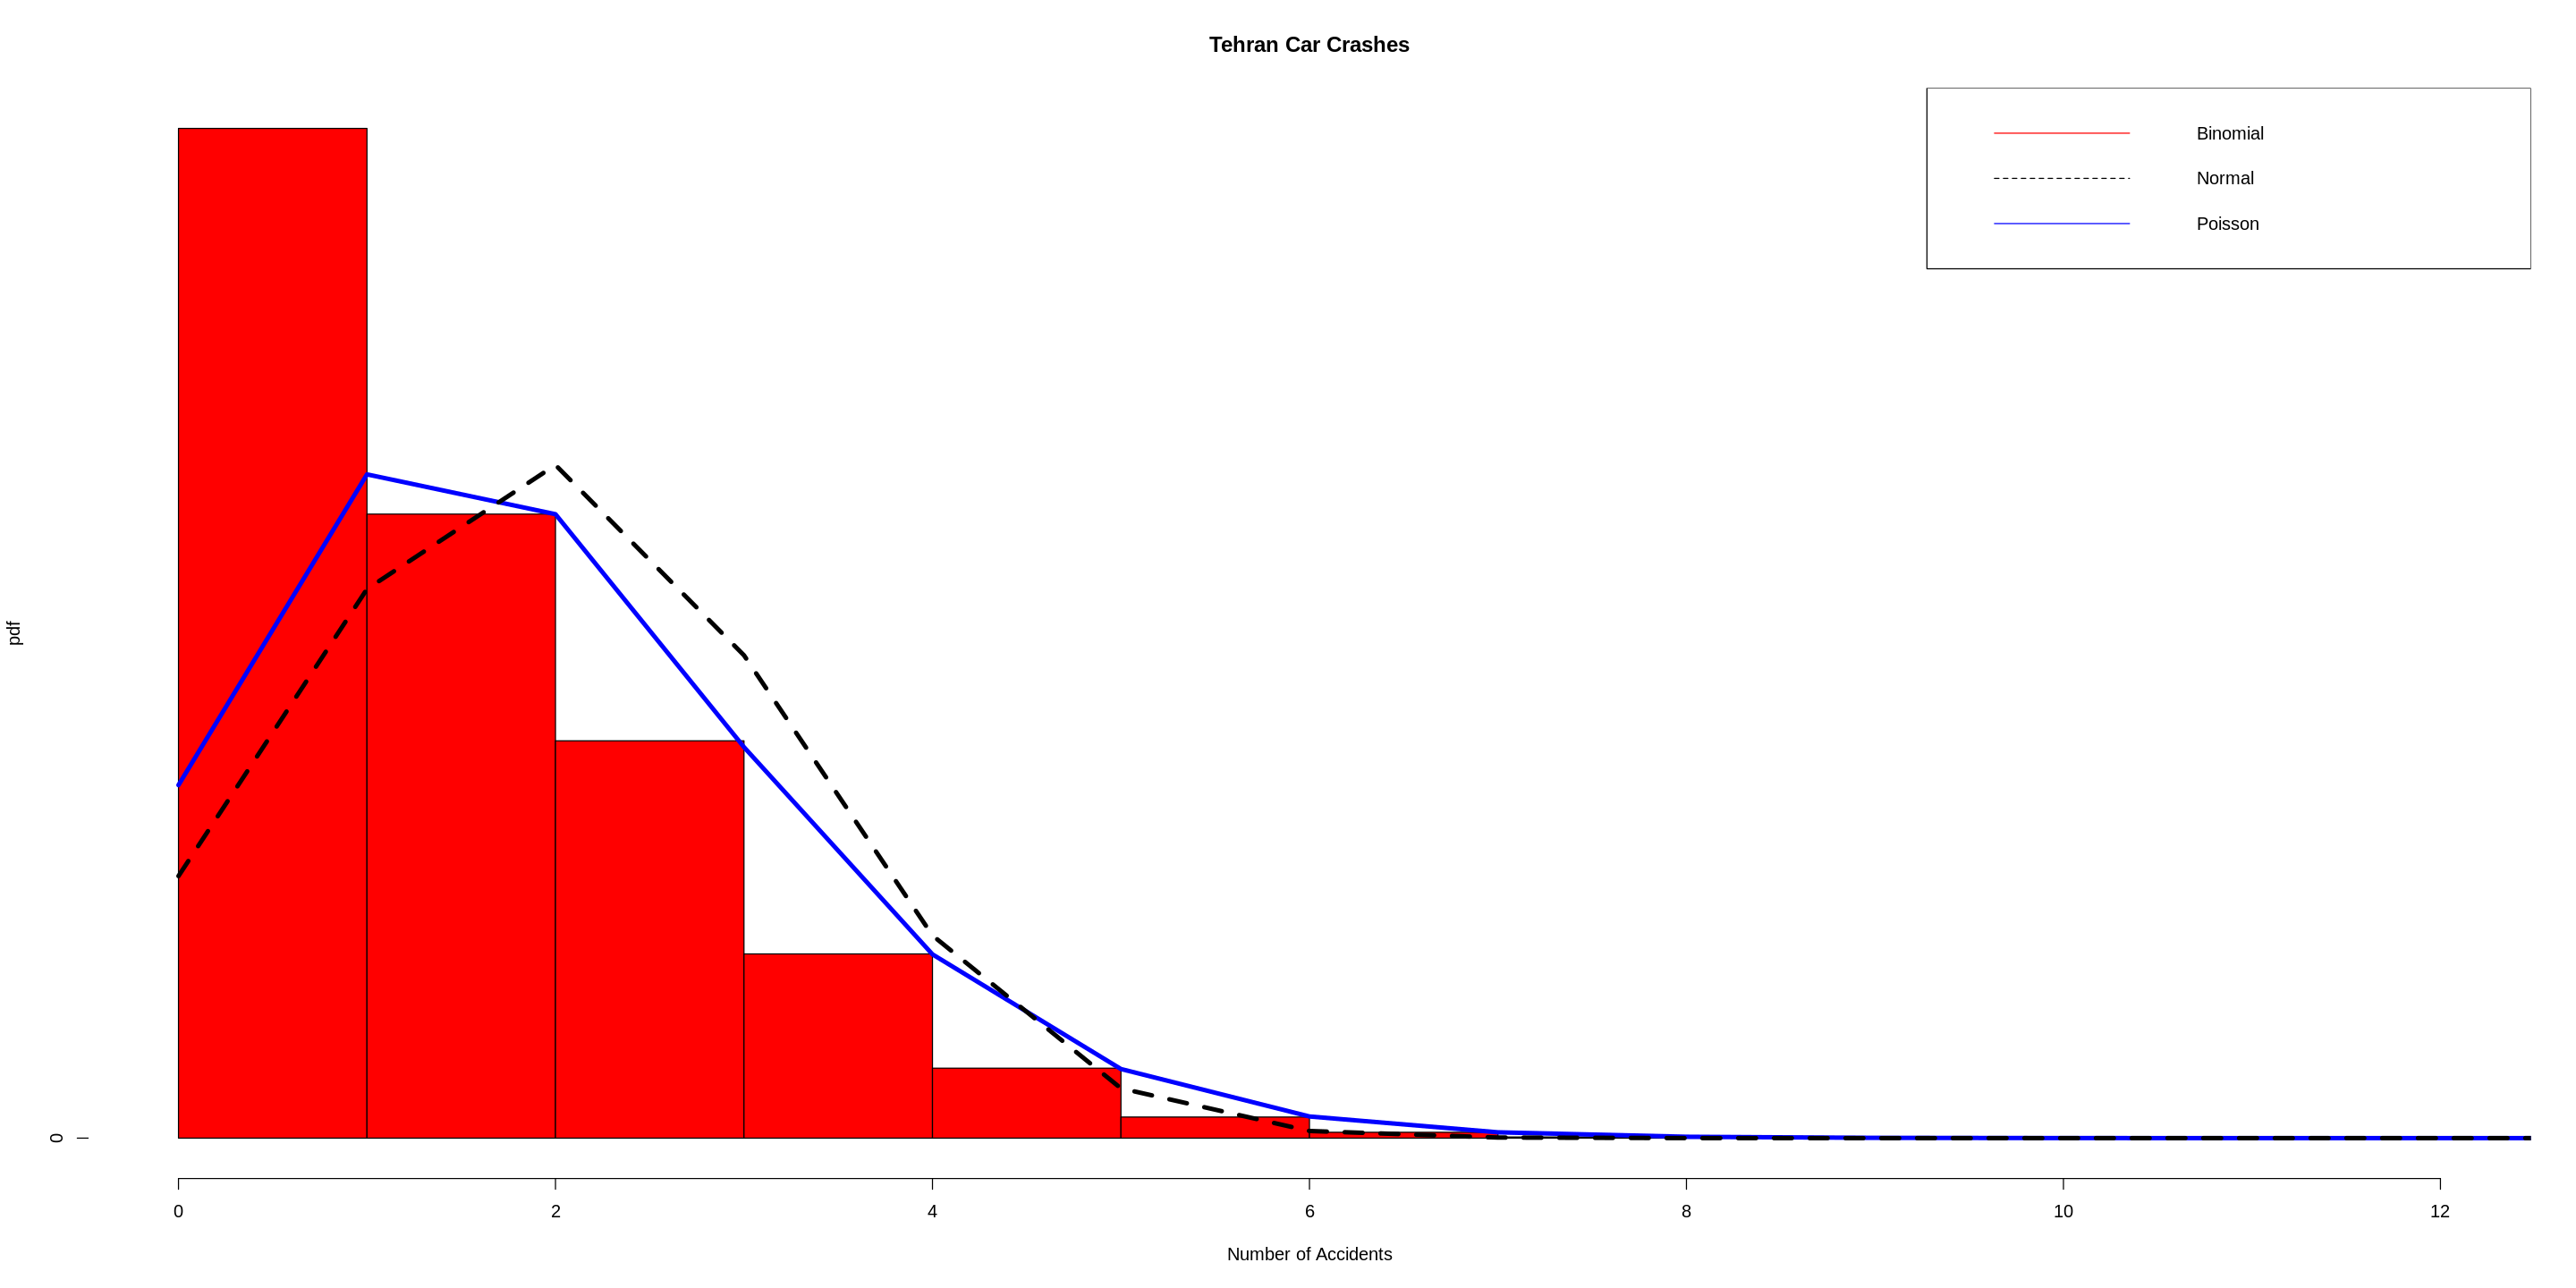

In [1]:
# Choose a proper interval
t <- seq(0,20,by = 1)

# Generate Binomial samples
samples <- rbinom(100000,235,0.008)

         
# We want plot the histogram of samples.                      #
# First construct the histogram of samples                    #                  
# Then, convert the histogram from frequency to               #
# probability                                                 #
x <- hist(samples,
     breaks= seq(0, 12, 1),
     plot=FALSE)

x$counts=x$counts/sum(x$counts)


# Create the Poisson distribution
x1 <- dpois(t,lambda = 1.88)

# Create the Normal distribution
x2 <- dnorm(t, mean = 1.88, sd = 1.366)


options(repr.plot.width=24, repr.plot.height=12)
par(mfrow=c(1,1))

plot(x,xlab = "Number of Accidents", type = "l", ylab = "pdf", lty=1,
    main = "Tehran Car Crashes", col = 'red')
lines(t, x1,col = 'blue', lty=1, lwd = 4)
lines(t, x2,col = 'black', lty=2, lwd = 4)

#hist(samples,xlab = "Number of Accidents", freq = FALSE, ylab = "pdf", xlim = c(0,10),
#     breaks = 10, main = "Tehran Car Crashes ", col = 'red')
#lines(t, x1,col = 'blue', lty=1, lwd = 4)
#lines(t, x2,col = 'black', lty=2, lwd = 4)

# 4. Add a legend to the plot and set legend lty
legend("topright", legend = c("Binomial", "Normal", "Poisson"),
       col = c("red", "black", 'blue'), lty = 1:2, cex = 1)

<div dir='rtl'>
کدام تقریب سازگار‌تر است؟ استدلال خود را مطرح نمایید.

<div dir='rtl'>

<div dir='rtl'>
<b>
همانطور که از نمودار پیداست، تقریب پواسون تقریب سازگارتری است.

<div dir='rtl'>

<div dir='rtl'>
حال در این بخش قصد داریم مثال دیگری را بررسی نماییم و اهمیت تقریب نرمال را تحقیق کنیم.
<br/>
مثال) مطابق گزارش مرکز آمار ایران، زخمی شدن یک شهروند تهرانی در تصادفات درون شهری از یک توزیع برنولی با احتمال 
$p = 0.45$
پیروی می‌نماید و همچنین ماهانه به صورت میانگین 7072 تصادف در شهر تهران رخ می‌دهد. اگر تعداد افراد زخمی شده ناشی از تصادفات درون شهری تهران را متغیر تصادفی 
$Y$
با توزیع دو‌جمله‌ای در نظر بگیریم مشابه قبل داریم:
<br/>
$$ Y \sim Bin(7072, 0.45)$$
<br/>
<div dir='rtl'>

<div dir='rtl'>
 مشابه قبل می‌دانیم تقریب‌های پواسن و نرمال از متغیر تصادفی 
$Y$
به شرح زیر می‌باشد:
<br/>
$$\hat{Y}_1 \sim Poi(3182.59)$$
<br/>
$$\hat{Y}_2 \sim \mathcal{N}(3182.59, 41.84)$$
</div>

<div dir='rtl'>
مطابق اسلاید‌های درس می‌دانیم در توزیع‌های دو‌جمله‌ای، برای احتمال‌های نزدیک به $0.5$
تقریب نرمال مناسبی است اما تقریب‌های پواسن برای احتمال‌های نزدیک به
$0$
دارای اعتبار می‌باشند. بنابراین انتظار داریم تقریب نرمال برای مسئله‌ی حاضر عملکرد بهتری داشته باشد.
</div>

<div dir='rtl'>
در این بخش قصد داریم با رسم نمودار توزیع‌های مذکور، درستی ادعاهای مطرح شده پیرامون تقریب توزیع دو‌جمله‌ای را به صورت عملی بررسی نماییم.
</div>

Warning message in plot.window(xlim, ylim, "", ...):
“graphical parameter "type" is obsolete”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“graphical parameter "type" is obsolete”
Warning message in axis(1, ...):
“graphical parameter "type" is obsolete”
Warning message in axis(2, at = yt, ...):
“graphical parameter "type" is obsolete”


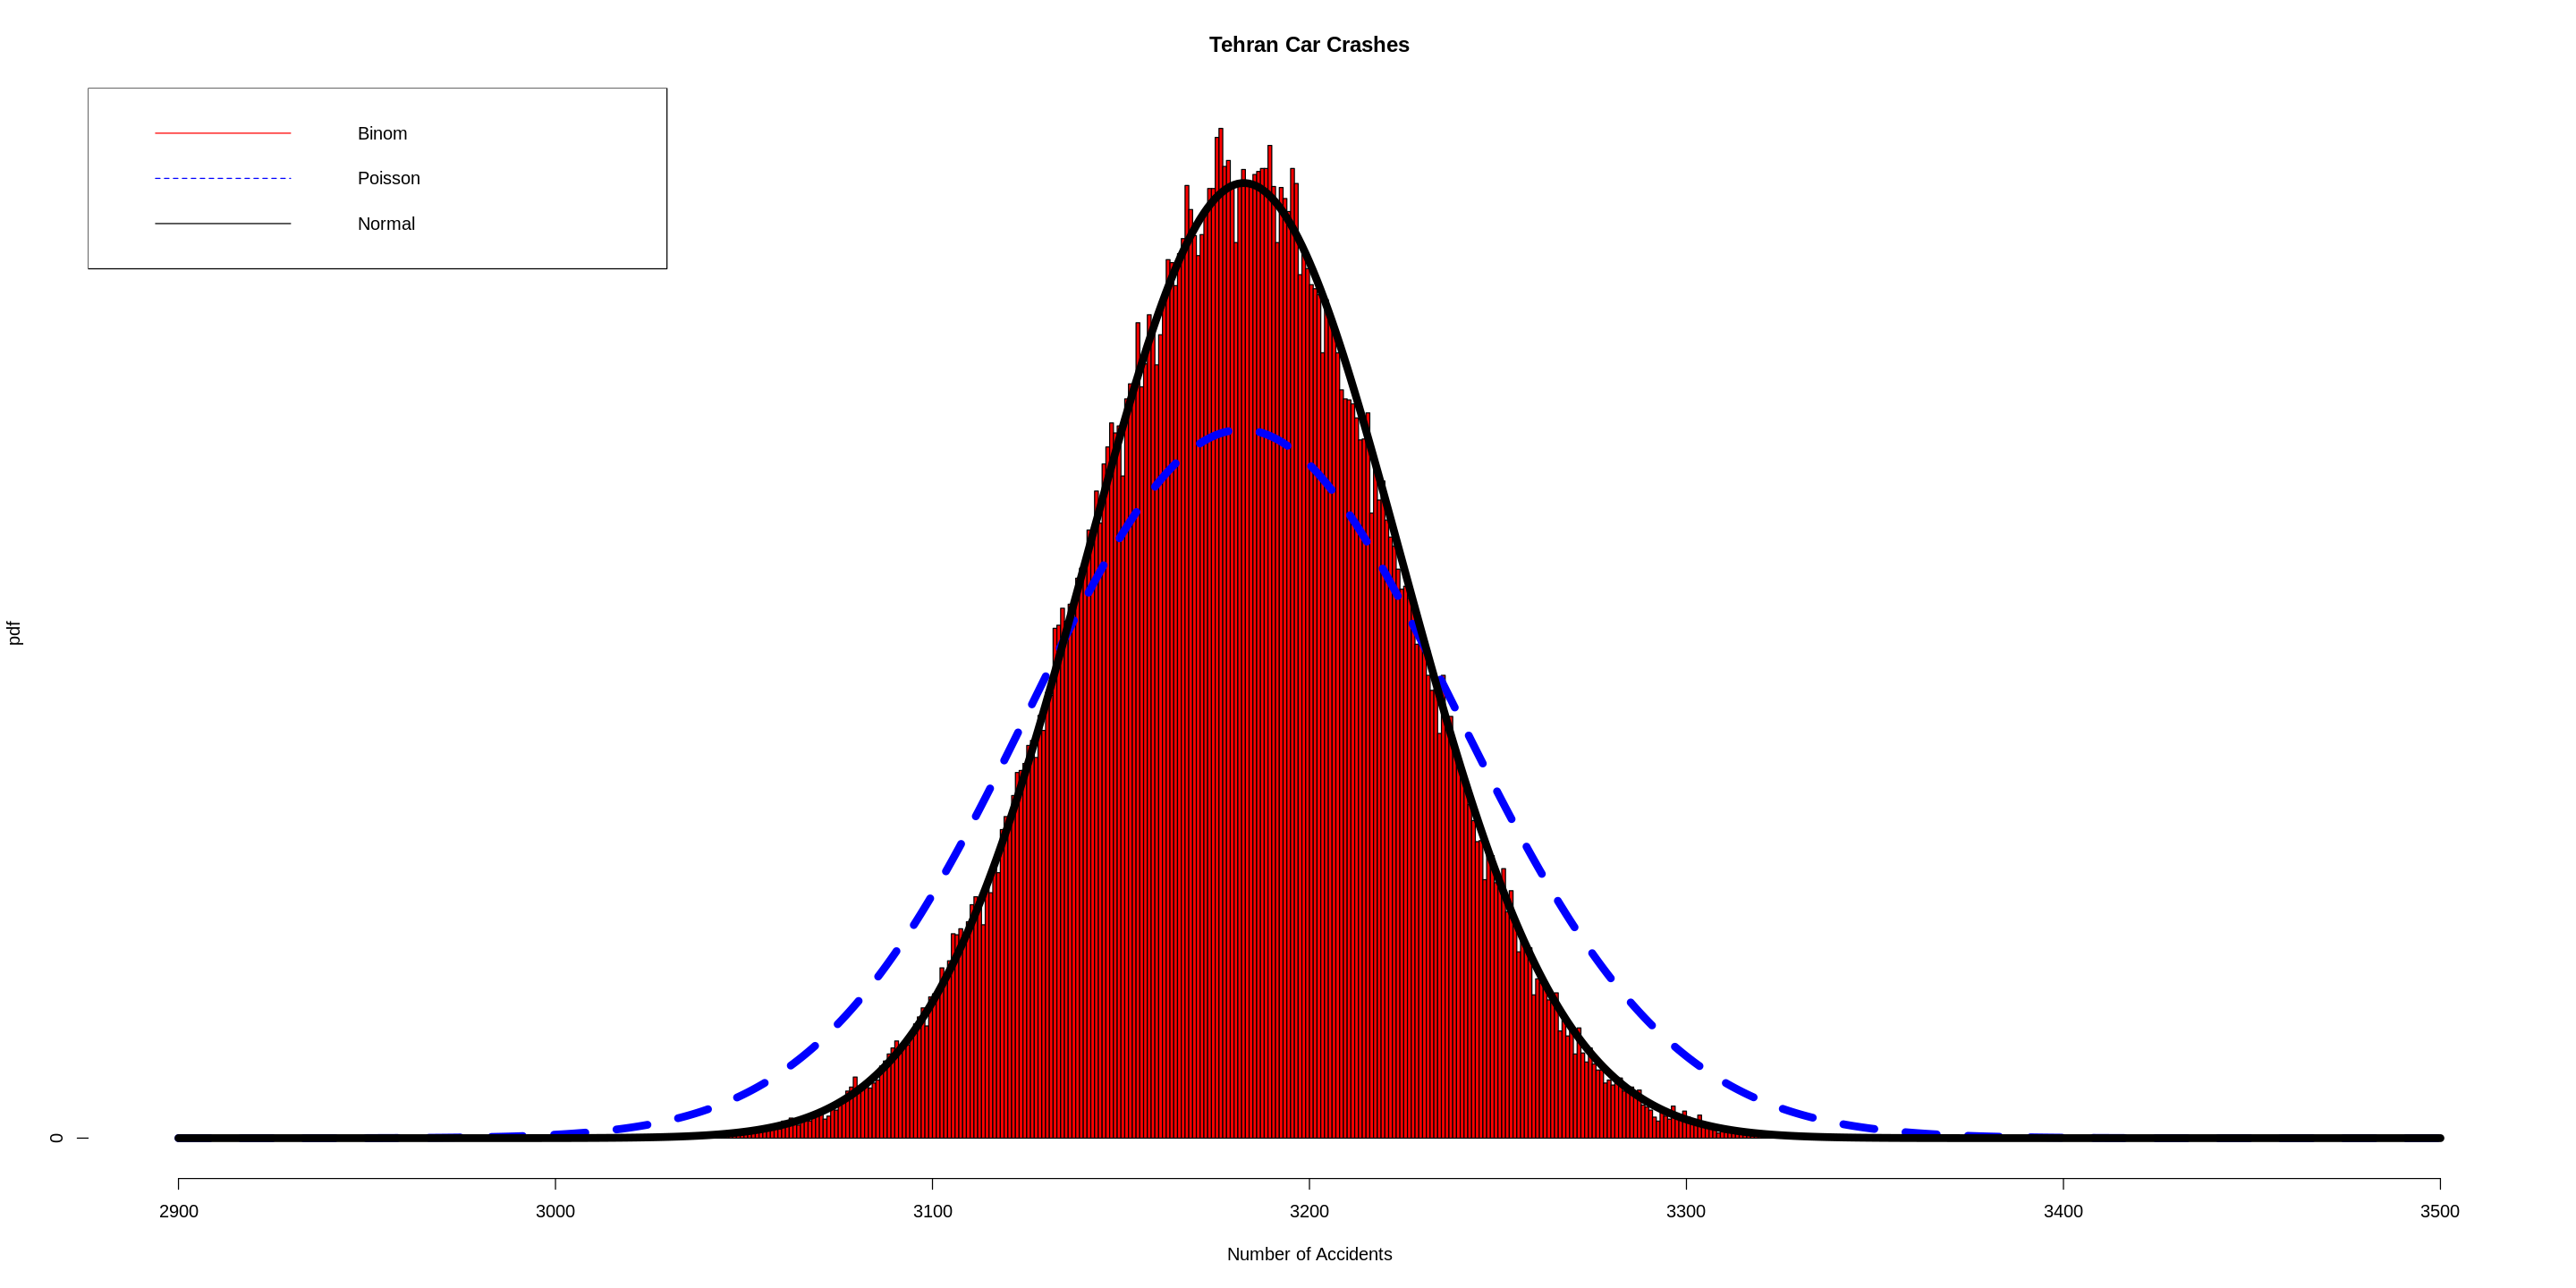

In [2]:
# Choose a proper interval
t <- seq(2900,3500,by = 1)

# Generate  Binomial samples
samples <- rbinom(100000,7072,0.45)

         
# We want plot the histogram of samples.                      #                      
# Same the previous part                                      #
y <- hist(samples, breaks= seq(2900,3500, 1), plot = FALSE)
y$counts=y$counts/sum(y$counts)


# Create the Poisson distribution
y1 <- dpois(t,lambda = 3182.59)


# Create the normal distribution                              #
# with proper mean and std                                    #
y2 <- dnorm(t,mean = 3182.59, sd = 41.84)


options(repr.plot.width=24, repr.plot.height=12)
par(mfrow=c(1,1))

plot(y,xlab = "Number of Accidents", type = "l", ylab = "pdf", lty=1,
    main = "Tehran Car Crashes", col = 'red')
lines(t, y1,col = 'blue', lty=2, lwd = 7)
lines(t, y2,col = 'black', lty=1, lwd = 7)

# 4. Add a legend to the plot and set legend lty
legend("topleft", legend = c("Binom", "Poisson", "Normal"),
       col = c("red", "blue", "black"), lty = 1:2, cex = 1)

<div dir='rtl'>
کدام تقریب سازگار‌تر است؟ استدلال خود را مطرح نمایید.

<div dir='rtl'>

<div dir='rtl'>
<b>

همانطور که انتظار میرفت، بخاطر نزدیک 0.5 بودن احتمال، تقریب نرمال بسیار بهتر عمل میکند
<div dir='rtl'>